In [1]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
print("train data:", x_img_train.shape, y_label_train.shape)
print("test data:", x_img_test.shape, y_label_test.shape)

train data: (50000, 32, 32, 3) (50000, 1)
test data: (10000, 32, 32, 3) (10000, 1)


In [4]:
def show(x_img,i):
  plt.figure(figsize=(2,2))
  plt.imshow(x_img[i])
  plt.show()

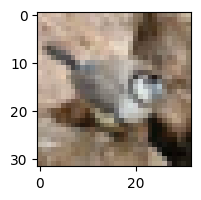

In [5]:
show(x_img_train,90)

In [6]:
# matplotlib還可以玩什麼?
# r,g,b三色轉換

In [7]:
def show_new(x_img,i):
  plt.figure(figsize=(2,2))
  img_new = x_img[i].copy()
  img_new[:,:,0] = x_img[i][:,:,1]
  img_new[:,:,1] = x_img[i][:,:,2]
  img_new[:,:,2] = x_img[i][:,:,0]
  plt.imshow(img_new)
  plt.show()

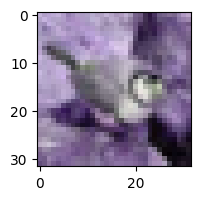

In [8]:
show_new(x_img_train,90)

In [9]:
# 題目1.如何裁切照片?

In [10]:
# 資料前處裡(正規化、onehot-encoding)

In [11]:
x_img_train_normalize = x_img_train.astype('float32')/ 255.0
x_img_test_normalize = x_img_test.astype('float32')/ 255.0

In [12]:
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [13]:
y_label_train_OneHot.shape

(50000, 10)

In [14]:
y_label_test_OneHot.shape

(10000, 10)

In [15]:
# 題目二

In [16]:
Cifar10 = Sequential()
Cifar10.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
Cifar10.add(MaxPooling2D(pool_size=(2,2)))
Cifar10.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
Cifar10.add(MaxPooling2D(pool_size=(2,2)))
Cifar10.add(Flatten())
Cifar10.add(Dense(1024, activation='relu'))
Cifar10.add(Dense(10, activation='softmax'))
print(Cifar10.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,224,970 (16.12 MB)

 Trainable params: 4,224,970 (16.12 MB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
###訓練參數設定
Cifar10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history=Cifar10.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3428 - loss: 1.8492 - val_accuracy: 0.5431 - val_loss: 1.3173
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6085 - loss: 1.1224 - val_accuracy: 0.6403 - val_loss: 1.0324
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6733 - loss: 0.9295 - val_accuracy: 0.6692 - val_loss: 0.9482
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7151 - loss: 0.8182 - val_accuracy: 0.6813 - val_loss: 0.9149
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7576 - loss: 0.6986 - val_accuracy: 0.6897 - val_loss: 0.8954
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7890 - loss: 0.6086 - val_accuracy: 0.7144 - val_loss: 0.8446
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8308 - loss: 0.4952 - val_accuracy: 0.7153 - val_loss: 0.8592
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8691 - loss: 0.3965 - val_accuracy: 0

In [18]:
scores = Cifar10.evaluate(x_img_test_normalize, y_label_test_OneHot, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7179 - loss: 1.0483


In [19]:
pre = Cifar10.predict(x_img_test_normalize, batch_size=1)
prediction = np.argmax(pre, axis=1)
prediction

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


array([3, 1, 0, ..., 2, 4, 7])

In [20]:
prediction[:10]

array([3, 1, 0, 0, 6, 6, 1, 2, 3, 1])

In [21]:
y_label_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [22]:
# 題目三

In [23]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [24]:
def show(x_img, y_label, predict, i):
  print("label",label_dict[y_label[i][0]],"predict",label_dict[predict[i]])
  plt.figure(figsize=(2,2))
  plt.imshow(x_img[i])
  plt.show()

label airplane predict airplane


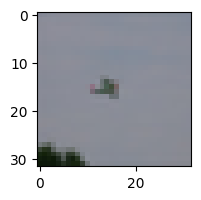

In [25]:
show(x_img_test, y_label_test, prediction, 97)

In [26]:
# softmax函式意義在哪?
Predicted_Probability = Cifar10.predict(x_img_test_normalize)
Predicted_Probability[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9.1833244e-06, 1.9992071e-07, 1.4925554e-03, 6.0796362e-01,
       8.8527668e-06, 3.9006269e-01, 3.4993813e-05, 3.1276279e-05,
       3.9606562e-04, 4.0105220e-07], dtype=float32)

In [58]:
#優化後

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D

Cifar10_opt = Sequential()
Cifar10_opt.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
Cifar10_opt.add(BatchNormalization())
Cifar10_opt.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
Cifar10_opt.add(BatchNormalization())
Cifar10_opt.add(MaxPooling2D(pool_size=(2, 2)))
Cifar10_opt.add(Dropout(0.25))

Cifar10_opt.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
Cifar10_opt.add(BatchNormalization())
Cifar10_opt.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
Cifar10_opt.add(BatchNormalization())
Cifar10_opt.add(MaxPooling2D(pool_size=(2, 2)))
Cifar10_opt.add(Dropout(0.25))

Cifar10_opt.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
Cifar10_opt.add(BatchNormalization())
Cifar10_opt.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
Cifar10_opt.add(BatchNormalization())
Cifar10_opt.add(MaxPooling2D(pool_size=(2, 2)))
Cifar10_opt.add(Dropout(0.25))

Cifar10_opt.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
Cifar10_opt.add(BatchNormalization())
Cifar10_opt.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
Cifar10_opt.add(BatchNormalization())
Cifar10_opt.add(MaxPooling2D(pool_size=(2, 2)))
Cifar10_opt.add(Dropout(0.25))

Cifar10_opt.add(GlobalAveragePooling2D())
Cifar10_opt.add(Dense(512, activation='relu'))
Cifar10_opt.add(BatchNormalization())
Cifar10_opt.add(Dropout(0.5))
Cifar10_opt.add(Dense(10, activation='softmax'))
print(Cifar10_opt.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,314,858 (5.02 MB)

 Trainable params: 1,311,914 (5.00 MB)

 Non-trainable params: 2,944 (11.50 KB)

None


In [67]:
# 訓練參數設定
Cifar10_opt.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history=Cifar10_opt.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=30, batch_size=128)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.9714 - loss: 0.0834 - val_accuracy: 0.8461 - val_loss: 0.7000
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.9720 - loss: 0.0851 - val_accuracy: 0.8444 - val_loss: 0.7209
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9739 - loss: 0.0755 - val_accuracy: 0.8318 - val_loss: 0.7638
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9731 - loss: 0.0792 - val_accuracy: 0.8510 - val_loss: 0.6698
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9732 - loss: 0.0778 - val_accuracy: 0.8521 - val_loss: 0.6664
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9759 - loss: 0.0723 - val_accuracy: 0.8569 - val_loss: 0.6427
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9757 - loss: 0.0696 - val_accuracy: 0.8467 - val_loss: 0.7219
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9759 - loss: 0.0663 - val

In [68]:
scores = Cifar10_opt.evaluate(x_img_test_normalize, y_label_test_OneHot, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.8482 - loss: 0.7258
